In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

https://habr.com/ru/company/ruvds/blog/488342/

In [3]:
columns = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']

In [4]:
data = load_breast_cancer()

In [5]:
df = pd.DataFrame(data['data'], columns=columns)

In [6]:
df['cancer'] = data['target']

# Split

In [7]:
X = df.drop('cancer', axis=1)
y = df.cancer

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
    test_size=0.5, random_state=2020)

# Масштабирование данных (стандартизация) - переход на mean&std

In [9]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)
y_train = np.array(y_train)

# Обучение базовой модели

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score
rfc = RandomForestClassifier()
rfc.fit(X_train_scaled, y_train)
rfc.score(X_train_scaled, y_train)

1.0

In [11]:
rfc.feature_importances_

array([0.04242695, 0.00559106, 0.05808875, 0.07948792, 0.00603043,
       0.00406689, 0.02221226, 0.03999171, 0.00275905, 0.00490507,
       0.00579605, 0.00327531, 0.00707337, 0.04705737, 0.00230532,
       0.00628106, 0.00442206, 0.00255588, 0.00178621, 0.0030378 ,
       0.11421853, 0.00980741, 0.13987469, 0.15301696, 0.00961575,
       0.01238286, 0.04111353, 0.1511044 , 0.0130754 , 0.00663995])

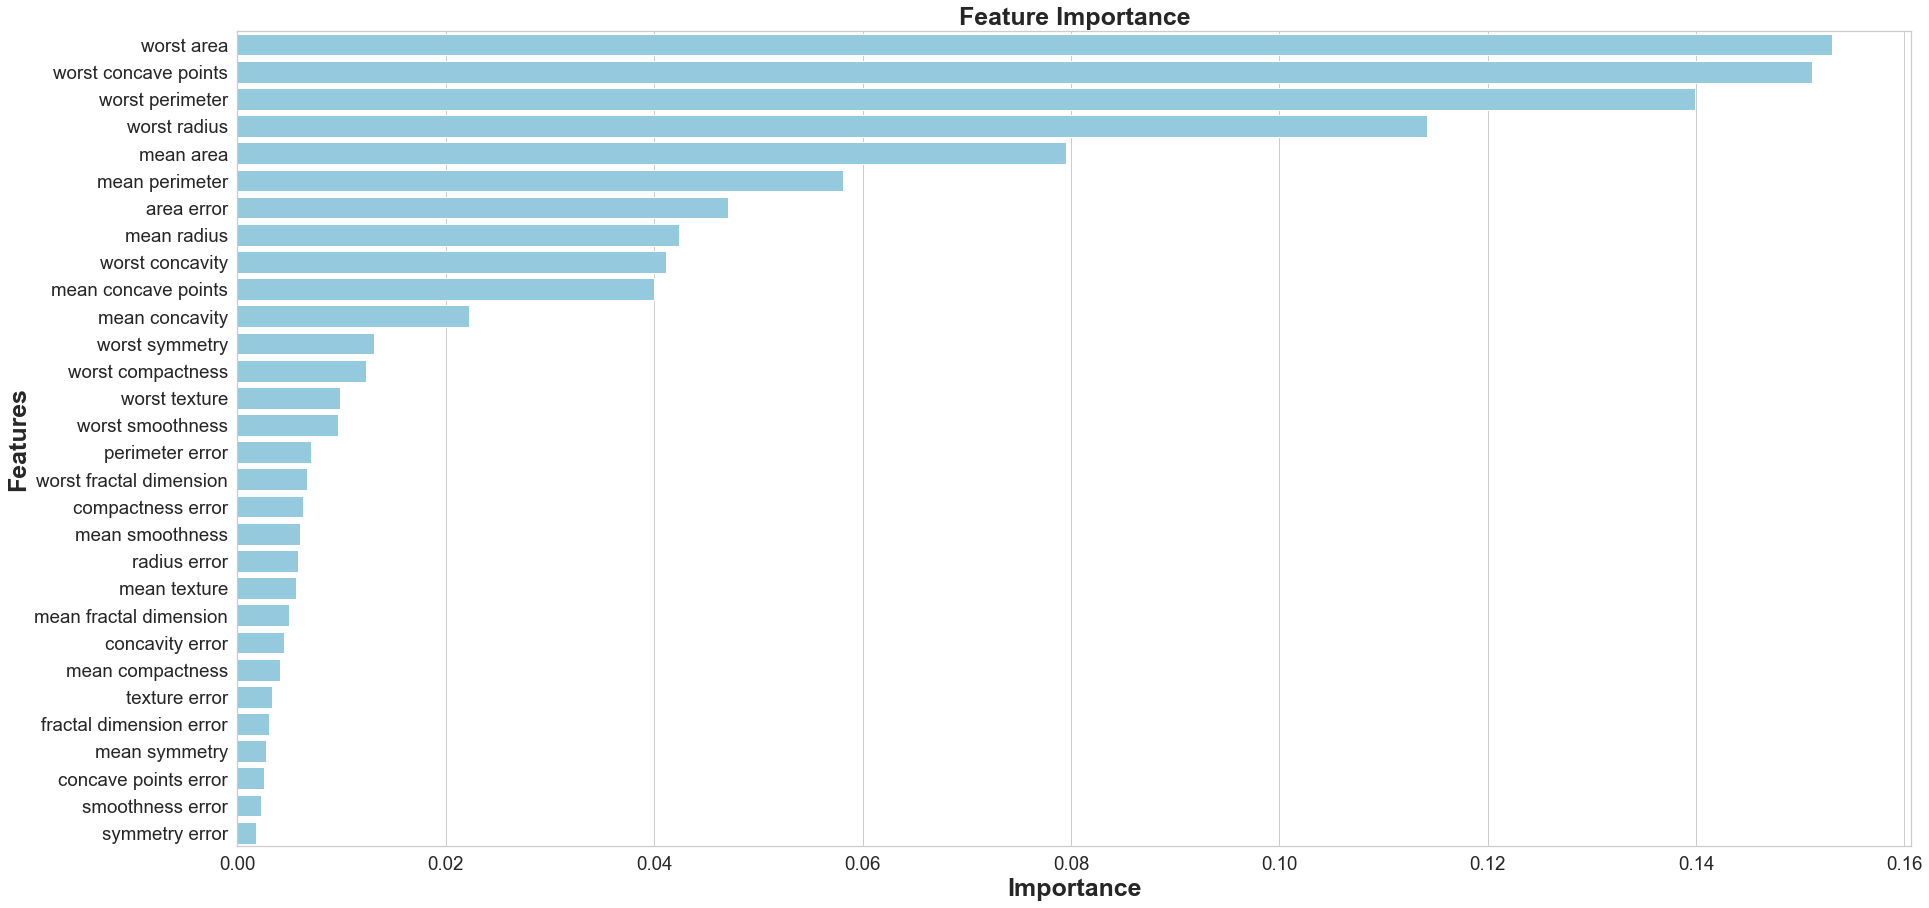

None

In [12]:
feats = {}
for feature, importance in zip(df.columns, rfc.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})

sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('Importance', fontsize=25, weight = 'bold')
plt.ylabel('Features', fontsize=25, weight = 'bold')
plt.title('Feature Importance', fontsize=25, weight = 'bold')
display(plt.show())

# Реализуем метод главных компонент - смотрим какие из переменных оказывают наибольшее влияние на ЗП

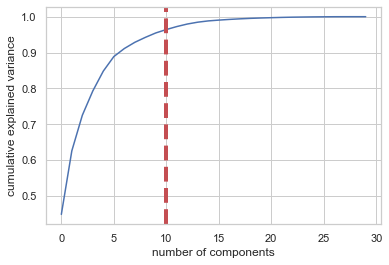

None

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.448362,0.448362
1,0.625759,0.177397
2,0.724960,0.099201
3,0.792890,0.067930
4,0.848247,0.055357
5,0.888681,0.040435
6,0.911139,0.022457
7,0.928491,0.017353
8,0.942257,0.013766
9,0.954676,0.012419


In [13]:
from sklearn.decomposition import PCA

pca_test = PCA(n_components=30)
pca_test.fit(X_train_scaled)

sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axvline(linewidth=4, color='r', linestyle = '--', x=10, ymin=0, ymax=1)
display(plt.show())

evr = pca_test.explained_variance_ratio_
cvr = np.cumsum(pca_test.explained_variance_ratio_)
pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df.head(10))

# Оставляем только 10 НП и смотрим веса из РСА компонент

In [14]:
pca = PCA(n_components=10)
pca.fit(X_train_scaled)
X_train_scaled_pca = pca.transform(X_train_scaled)
X_test_scaled_pca = pca.transform(X_test_scaled)

In [15]:
pca_dims = []
for x in range(0, len(pca_df)):
    pca_dims.append('PCA Component {}'.format(x))
pca_test_df = pd.DataFrame(pca_test.components_, columns=columns, index=pca_dims)
pca_test_df.head(10).T

,PCA Component 0,PCA Component 1,PCA Component 2,PCA Component 3,PCA Component 4,PCA Component 5,PCA Component 6,PCA Component 7,PCA Component 8,PCA Component 9
mean radius,0.229757,-0.210916,-0.030019,0.046463,0.033286,0.015126,-0.069528,-0.188402,-0.123401,-0.073688
mean texture,0.101159,-0.069574,0.058763,-0.596565,0.003598,-0.043046,0.063547,0.073671,0.162137,-0.154302
mean perimeter,0.236449,-0.193037,-0.028313,0.047683,0.031936,0.007210,-0.063591,-0.188007,-0.121388,-0.064397
mean area,0.230530,-0.212977,0.013286,0.065251,-0.004611,0.000570,-0.006363,-0.095945,-0.136370,-0.082562
mean smoothness,0.137090,0.205970,-0.031698,0.117614,-0.453585,-0.079954,-0.162701,-0.178166,0.124023,0.384612
mean compactness,0.237018,0.166762,-0.048961,0.023697,-0.001176,-0.064327,0.040522,-0.219044,0.004426,0.042943
mean concavity,0.258283,0.046613,0.015929,0.017595,0.080184,-0.038802,-0.094767,0.066544,-0.072309,0.109753
mean concave points,0.261131,-0.027002,-0.012987,0.044803,-0.054359,-0.032057,-0.145943,-0.175107,-0.062065,0.034035
mean symmetry,0.142589,0.199079,-0.025816,0.011965,-0.171304,0.425826,-0.052532,-0.192594,0.573150,-0.366492
mean fractal dimension,0.048243,0.374409,0.019466,0.052554,-0.125120,-0.206347,0.276034,-0.103717,0.037225,0.121591


# Построение biplot с помощью pca (это другой модуль, НЕ в sklearn!)

In [30]:
from pca import pca

In [45]:
pca_new = pca(n_components=0.95)
results = pca_new.fit_transform(X_train_scaled)

[pca] >Column labels are auto-completed.
[pca] >Row labels are auto-completed.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [30] columns of the input data.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Number of components is [10] that covers the [95.00%] explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[5]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


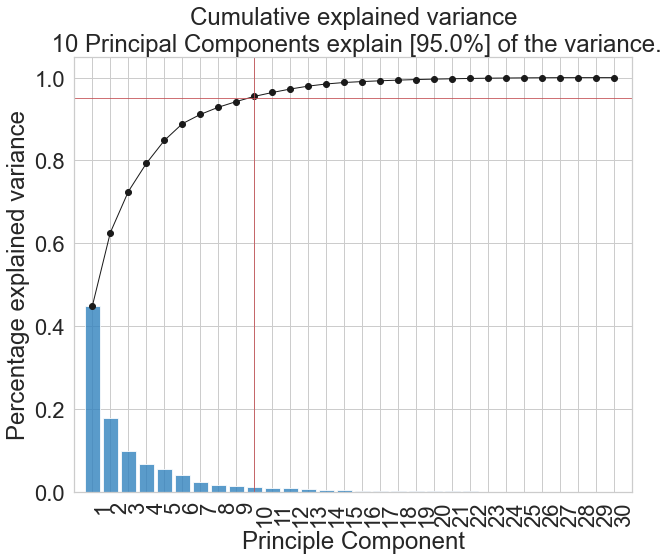

<Figure size 432x288 with 0 Axes>

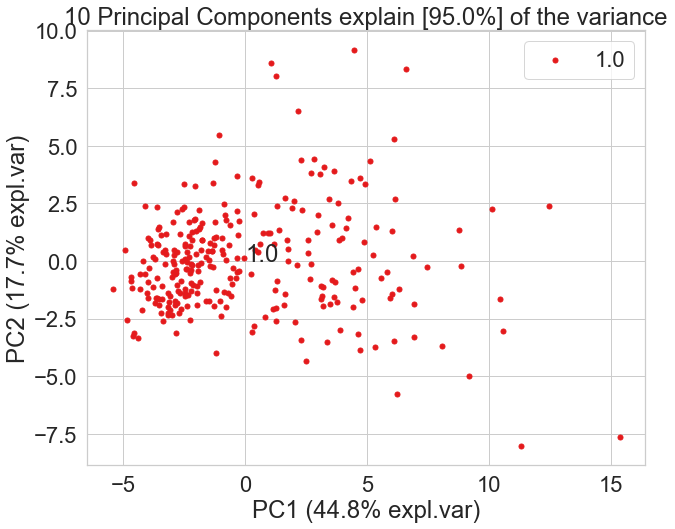

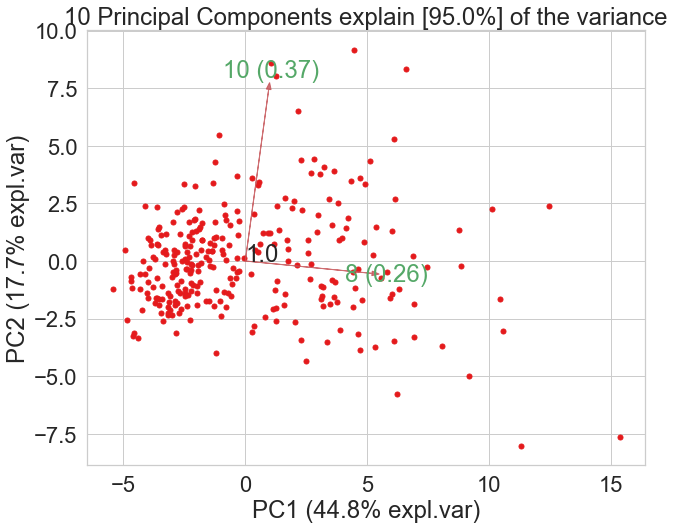

In [49]:
# Plot explained variance
fig, ax = pca_new.plot()

# Scatter first 2 PCs
fig, ax = pca_new.scatter()

# Make biplot with the number of features
fig, ax = pca_new.biplot(n_feat=2, legend=False)

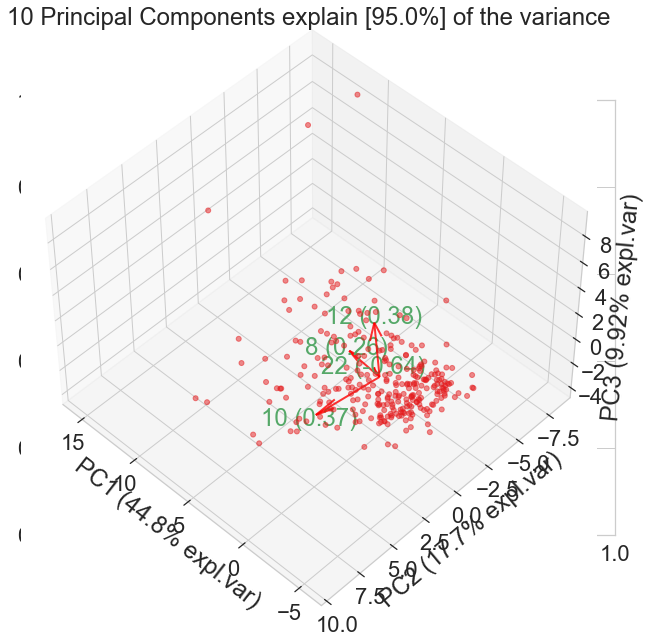

In [51]:
ax = pca_new.biplot3d(n_feat=4, legend=False, alpha_transparency=0.5)

# Обучение модели после применения РСА

In [17]:
rfc_1 = RandomForestClassifier()
rfc_1.fit(X_train_scaled_pca, y_train)
display(rfc_1.score(X_train_scaled_pca, y_train))

1.0

# Применяем RandomizedGridSearch

In [18]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
max_features = ['log2', 'sqrt']
max_depth = [int(x) for x in np.linspace(start = 1, stop = 15, num = 15)]
min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
min_samples_leaf = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
bootstrap = [True, False]
param_dist = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rs = RandomizedSearchCV(rfc_1, 
                        param_dist, 
                        n_iter = 100, 
                        cv = 3, 
                        verbose = 1, 
                        n_jobs=-1, 
                        random_state=0)
rs.fit(X_train_scaled_pca, y_train)
rs.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   27.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.7min finished


{'n_estimators': 700,
 'min_samples_split': 12,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 13,
 'bootstrap': False}

# Какие параметры прорабатывал RandGridSearch?

In [19]:
rs_df = pd.DataFrame(rs.cv_results_).sort_values('rank_test_score').reset_index(drop=True)
rs_df = rs_df.drop([
            'mean_fit_time', 
            'std_fit_time', 
            'mean_score_time',
            'std_score_time', 
            'params', 
            'split0_test_score', 
            'split1_test_score', 
            'split2_test_score', 
            'std_test_score'],
            axis=1)
rs_df.head(10)

,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_bootstrap,mean_test_score,rank_test_score
0,700,12,2,sqrt,13,False,0.929563,1
1,600,23,2,sqrt,15,False,0.926054,2
2,700,2,2,log2,11,True,0.922546,3
3,400,23,2,sqrt,14,False,0.922508,4
4,800,23,34,log2,15,True,0.922508,4
5,1000,12,7,sqrt,10,True,0.915491,6
6,200,12,2,log2,4,True,0.915454,7
7,200,44,34,log2,14,True,0.915454,7
8,400,12,39,sqrt,6,True,0.912019,9
9,1000,44,2,sqrt,9,True,0.911982,10


# Графики распределения влияния параметров на результат

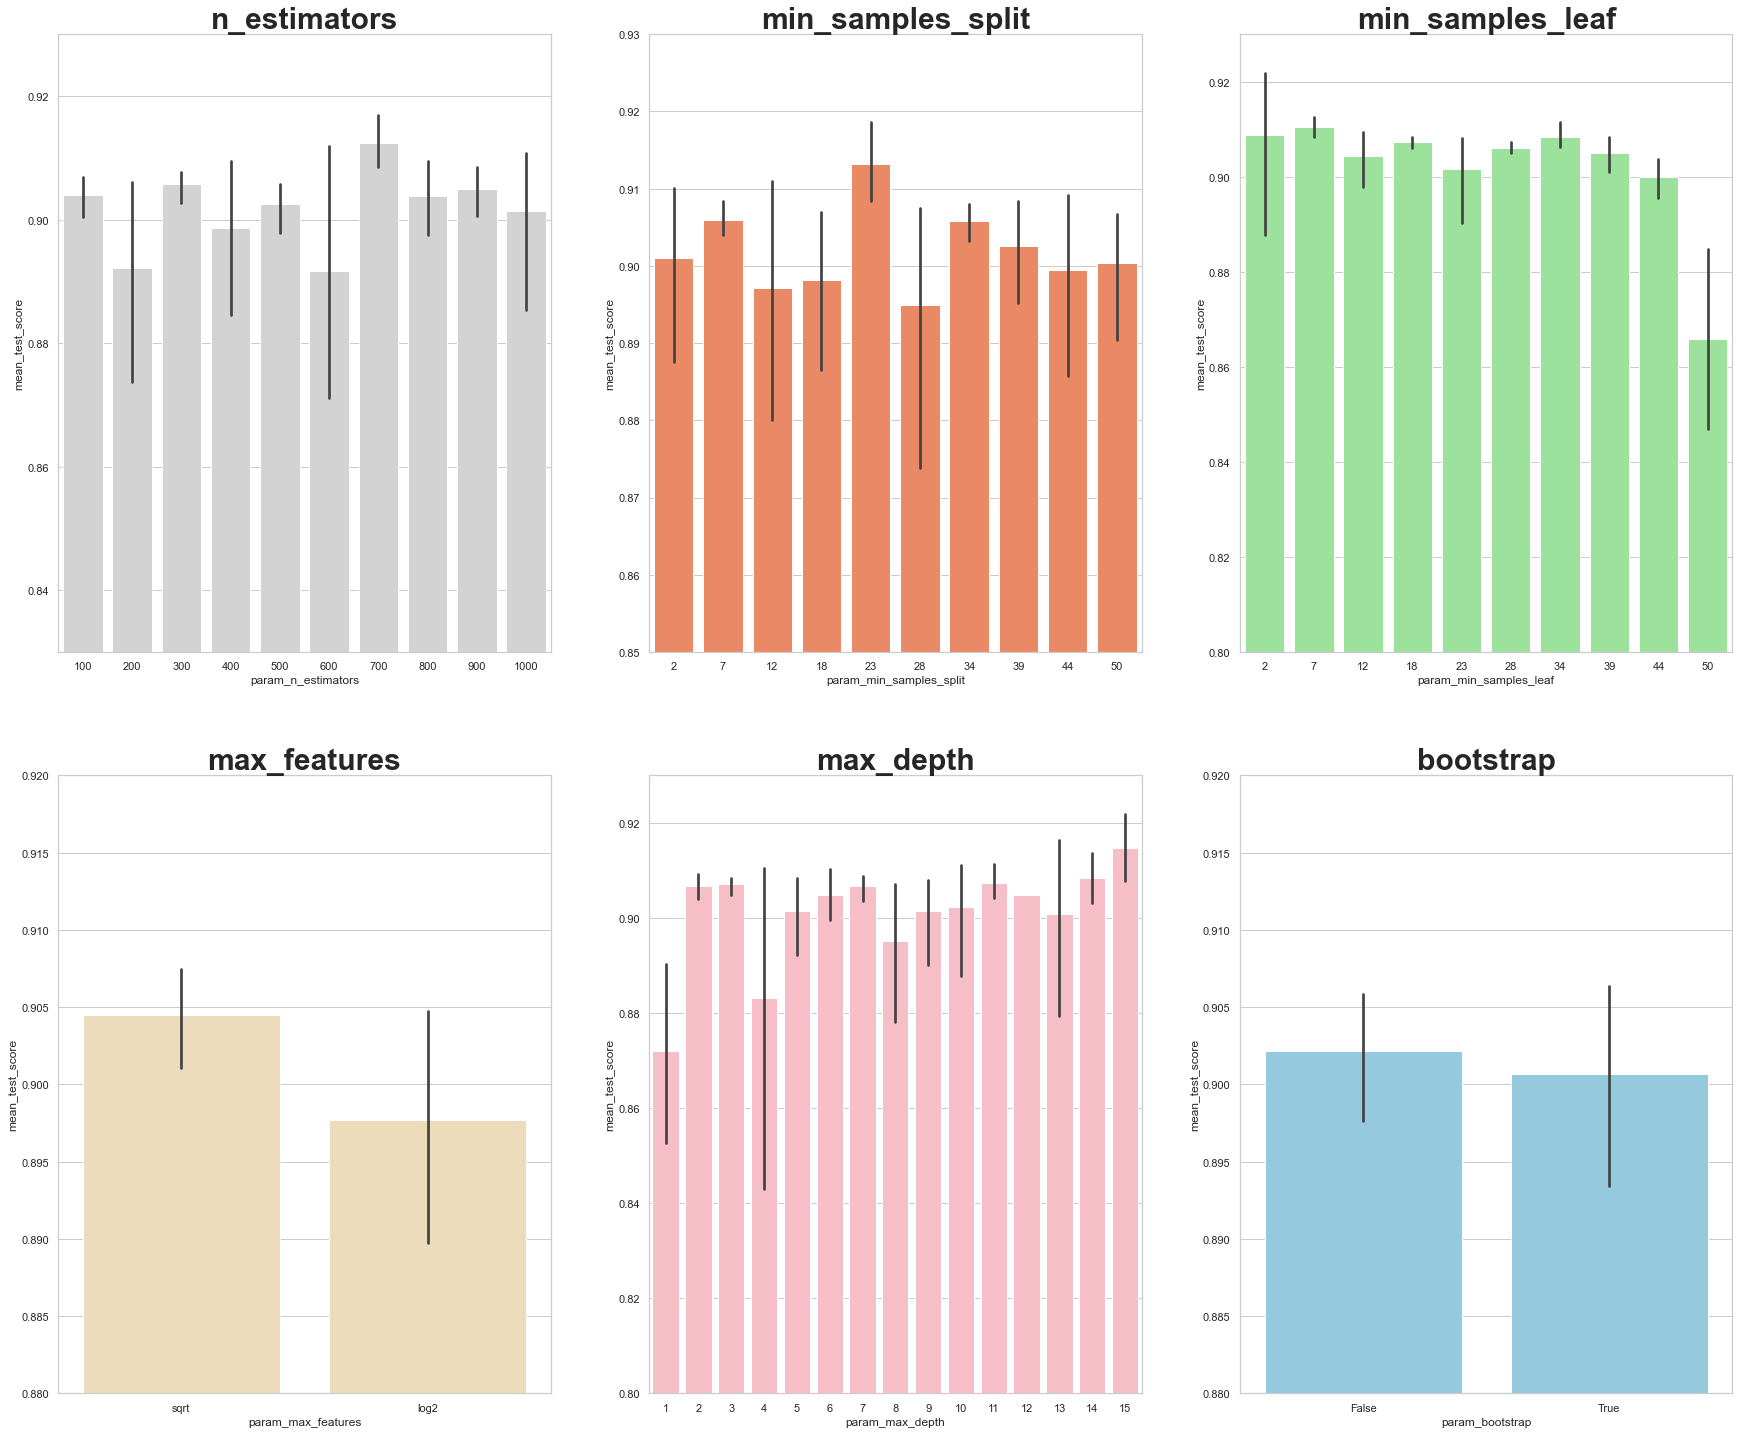

In [20]:
fig, axs = plt.subplots(ncols=3, nrows=2)
sns.set(style="whitegrid", color_codes=True, font_scale = 2)
fig.set_size_inches(30,25)
sns.barplot(x='param_n_estimators', y='mean_test_score', data=rs_df, ax=axs[0,0], color='lightgrey')
axs[0,0].set_ylim([.83,.93])
axs[0,0].set_title(label = 'n_estimators', size=30, weight='bold')
sns.barplot(x='param_min_samples_split', y='mean_test_score', data=rs_df, ax=axs[0,1], color='coral')
axs[0,1].set_ylim([.85,.93])
axs[0,1].set_title(label = 'min_samples_split', size=30, weight='bold')
sns.barplot(x='param_min_samples_leaf', y='mean_test_score', data=rs_df, ax=axs[0,2], color='lightgreen')
axs[0,2].set_ylim([.80,.93])
axs[0,2].set_title(label = 'min_samples_leaf', size=30, weight='bold')
sns.barplot(x='param_max_features', y='mean_test_score', data=rs_df, ax=axs[1,0], color='wheat')
axs[1,0].set_ylim([.88,.92])
axs[1,0].set_title(label = 'max_features', size=30, weight='bold')
sns.barplot(x='param_max_depth', y='mean_test_score', data=rs_df, ax=axs[1,1], color='lightpink')
axs[1,1].set_ylim([.80,.93])
axs[1,1].set_title(label = 'max_depth', size=30, weight='bold')
sns.barplot(x='param_bootstrap',y='mean_test_score', data=rs_df, ax=axs[1,2], color='skyblue')
axs[1,2].set_ylim([.88,.92])
axs[1,2].set_title(label = 'bootstrap', size=30, weight='bold')
plt.show()

# Применяем GridSearch на лучших параметрах

In [21]:
from sklearn.model_selection import GridSearchCV
n_estimators = [500,700]
max_features = ['sqrt']
max_depth = [3,7,11,15]
min_samples_split = [2,4,23]
min_samples_leaf = [2,3,5,7]
bootstrap = [False]
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
gs = GridSearchCV(rfc, param_grid, cv = 3, verbose = 1, n_jobs=-1)
gs.fit(X_train_scaled_pca, y_train)
rfc = gs.best_estimator_
gs.best_params_

Fitting 3 folds for each of 96 candidates, totalling 288 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   25.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 288 out of 288 | elapsed:  3.0min finished


{'bootstrap': False,
 'max_depth': 11,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 500}

# Оценка качества на тестовых данных по матрицам ошибок

In [22]:
y_pred = rfc.predict(X_test_scaled)
y_pred_pca = rfc_1.predict(X_test_scaled_pca)
y_pred_gs = gs.best_estimator_.predict(X_test_scaled_pca)

ValueError: Number of features of the model must match the input. Model n_features is 10 and input n_features is 30 

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
conf_matrix_baseline = pd.DataFrame(confusion_matrix(y_test, y_pred), index = ['actual 0', 'actual 1'], columns = ['predicted 0', 'predicted 1'])
conf_matrix_baseline_pca = pd.DataFrame(confusion_matrix(y_test, y_pred_pca), index = ['actual 0', 'actual 1'], columns = ['predicted 0', 'predicted 1'])
conf_matrix_tuned_pca = pd.DataFrame(confusion_matrix(y_test, y_pred_gs), index = ['actual 0', 'actual 1'], columns = ['predicted 0', 'predicted 1'])
display(conf_matrix_baseline)
display('Baseline Random Forest recall score', recall_score(y_test, y_pred))
display('F1 score', f1_score(y_test, y_pred))
display(conf_matrix_baseline_pca)
display('Baseline Random Forest With PCA recall score', recall_score(y_test, y_pred_pca))
display('F1 score', f1_score(y_test, y_pred_pca))
display(conf_matrix_tuned_pca)
display('Hyperparameter Tuned Random Forest With PCA Reduced Dimensionality recall score', recall_score(y_test, y_pred_gs))
display('F1 score', f1_score(y_test, y_pred_gs))

# Вторая модель показала лучшую точность. Нам важнее recall, т.к. главное не пропустить пациентов с раком